In [1]:
suppressMessages(library(monocle3, quietly=TRUE))
suppressMessages(library(ggplot2))

In [2]:
suppressMessages(library(anndata))

In [3]:
ad <- anndata::read_h5ad('endocrinogenesis.h5ad')

In [4]:
ad

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [5]:
X <- ad$X

In [6]:
pd = data.frame(rownames = ad$obs_names)
rownames(pd) = ad$obs_names

fd = data.frame(gene_short_name = ad$var_names)
rownames(fd) = ad$var_names

In [7]:
cds <- new_cell_data_set(Matrix::t(Matrix::as.matrix(X)),
                         cell_metadata = pd,
                         gene_metadata = fd)

In [8]:
cds <- preprocess_cds(cds, method = 'PCA',num_dim = 50,norm_method='none')

In [9]:
cds <- reduce_dimension(cds,reduction_method = 'UMAP', preprocess_method ='PCA')

In [10]:
cds <- cluster_cells(cds,cluster_method = 'leiden',resolution=0.001)

In [11]:
cds <- learn_graph(cds,use_partition =FALSE)

  |======================================================================| 100%


In [12]:
cds <- order_cells(cds,root_cells=rownames(pd)[2209])

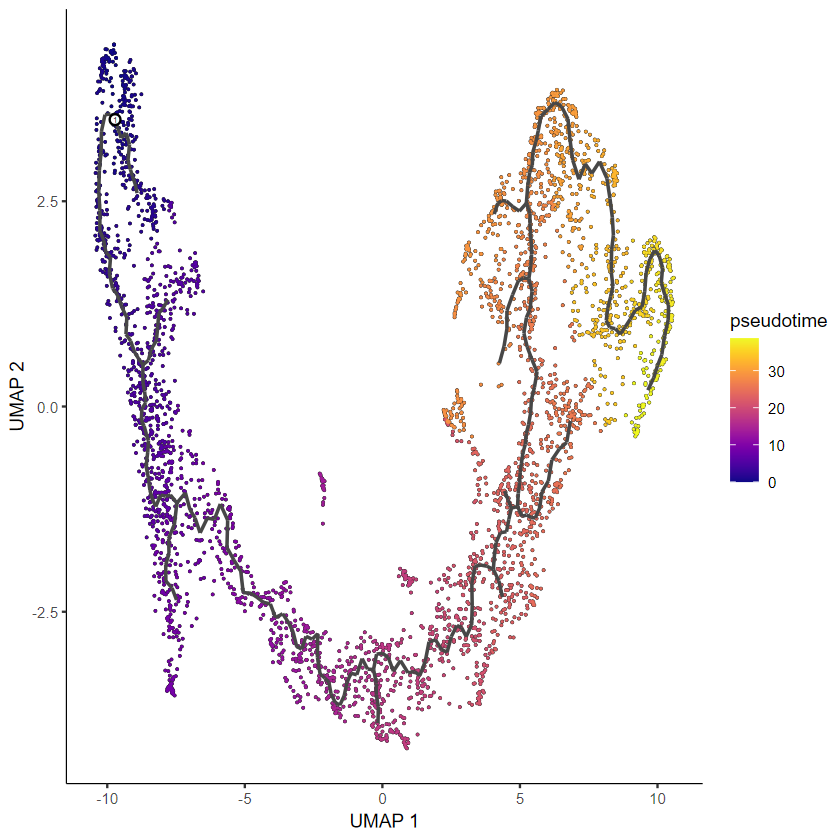

In [13]:
plot_cells(cds,
           color_cells_by = "pseudotime",
           label_cell_groups=FALSE,
           label_leaves=FALSE,
           label_branch_points=FALSE,
           graph_label_size=1.5)

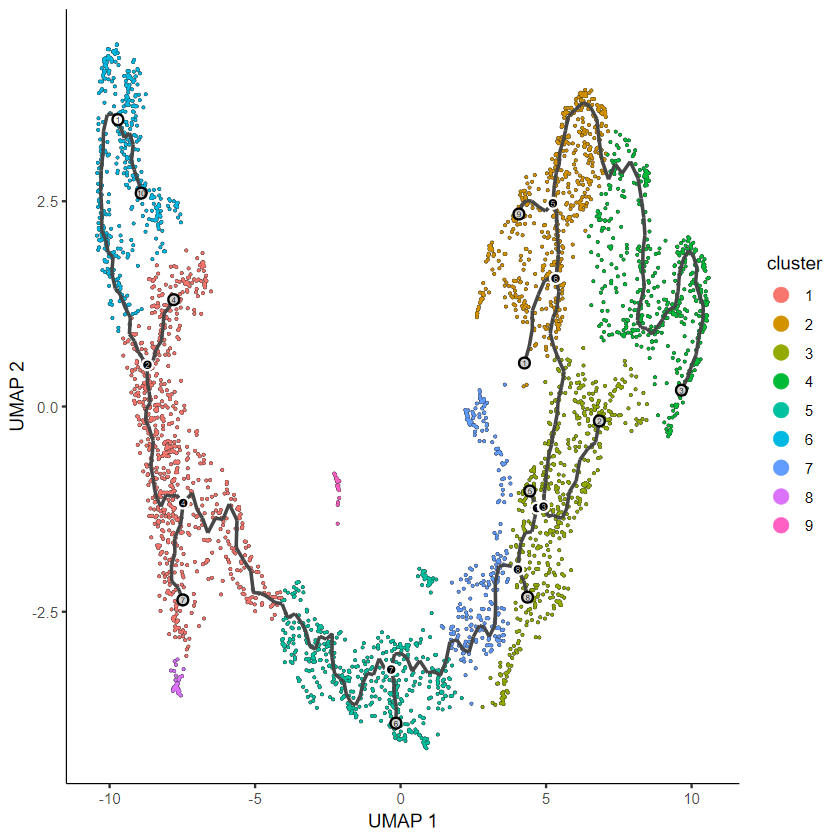

In [14]:
plot_cells(cds,
           color_cells_by = "cluster",
           label_cell_groups=FALSE,
           label_leaves=TRUE,
           label_branch_points=TRUE,
           graph_label_size=1.5)

In [15]:
write.csv(pseudotime(cds)/max(pseudotime(cds)),'pan.monocle_pseudotime.csv')